In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

In [30]:
plt.style.use('ggplot')

In [2]:
file_X = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp6_CAT_IONTORRENT_KMA_AKB/specificity_matrix/peptide_per_clonotype_by_gem_size/ct/no_filtration/concordance_matrix/X"
file_Y = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp6_CAT_IONTORRENT_KMA_AKB/specificity_matrix/peptide_per_clonotype_by_gem_size/ct/no_filtration/concordance_matrix/Y"
file_Z = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp6_CAT_IONTORRENT_KMA_AKB/specificity_matrix/peptide_per_clonotype_by_gem_size/ct/no_filtration/concordance_matrix/Z_conc"

In [3]:
X = np.loadtxt(file_X)
Y = np.loadtxt(file_Y)
Z = np.loadtxt(file_Z)

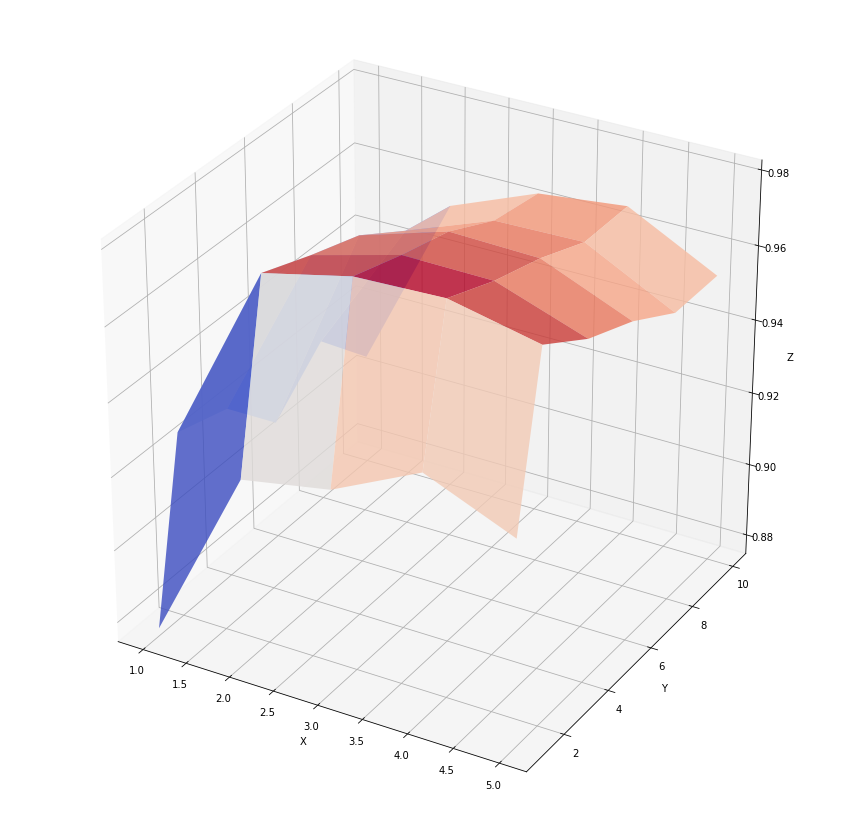

In [4]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.8, cmap=cm.coolwarm)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [5]:
df = pd.read_csv("/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp6_CAT_IONTORRENT_KMA_AKB/tables/tcr_barcode.cleaned.csv")

In [6]:
total_gems = df.shape[0]

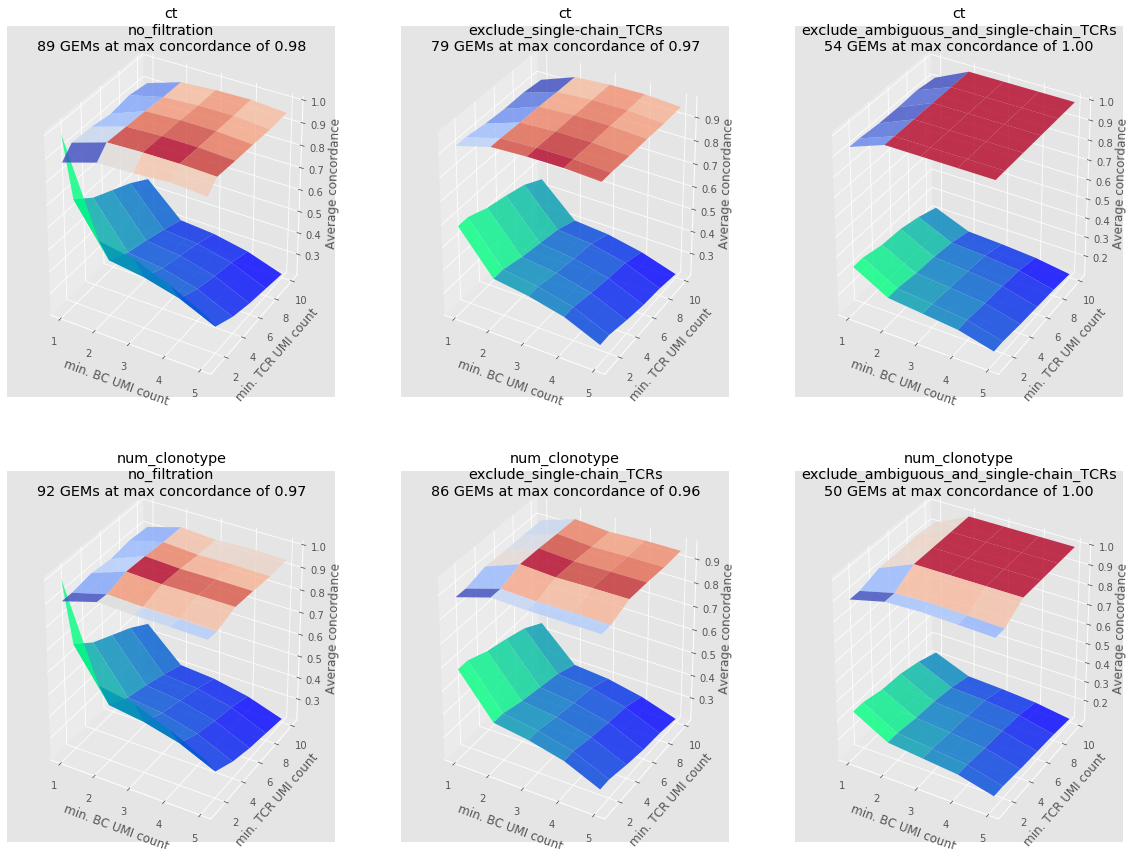

In [31]:
i = 1
fig = plt.figure(figsize=(20,15))
#ax = fig.gca(projection='3d')

for clonotype_fmt in ['ct', 'num_clonotype']:
    for filtration_level in ['no_filtration', 'exclude_single-chain_TCRs', 'exclude_ambiguous_and_single-chain_TCRs']:
        file_X = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp6_CAT_IONTORRENT_KMA_AKB/specificity_matrix/peptide_per_clonotype_by_gem_size/%s/%s/concordance_matrix/X"%(clonotype_fmt, filtration_level)
        file_Y = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp6_CAT_IONTORRENT_KMA_AKB/specificity_matrix/peptide_per_clonotype_by_gem_size/%s/%s/concordance_matrix/Y"%(clonotype_fmt, filtration_level)
        conc_Z = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp6_CAT_IONTORRENT_KMA_AKB/specificity_matrix/peptide_per_clonotype_by_gem_size/%s/%s/concordance_matrix/Z_conc"%(clonotype_fmt, filtration_level)
        gems_Z = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp6_CAT_IONTORRENT_KMA_AKB/specificity_matrix/peptide_per_clonotype_by_gem_size/%s/%s/concordance_matrix/Z_gems"%(clonotype_fmt, filtration_level)
        
        X = np.loadtxt(file_X)
        Y = np.loadtxt(file_Y)
        Zc = np.loadtxt(conc_Z)
        Zg = np.loadtxt(gems_Z)
        Zg = Zg / total_gems
        
        ind = np.unravel_index(np.argmax(Zc, axis=None), Zc.shape)
        
        ax = fig.add_subplot(2, 3, i, projection='3d')
        ax.plot_surface(X, Y, Zc, rstride=1, cstride=1, alpha=0.8, cmap=cm.coolwarm, label='Average concordance')
        ax.plot_surface(X, Y, Zg, rstride=1, cstride=1, alpha=0.8, cmap='winter', label='Pct. GEM')
        ax.set_xticks(X[0].astype(int))
        ax.set_xlabel('min. BC UMI count')
        ax.set_ylabel('min. TCR UMI count')
        ax.set_zlabel('Average concordance')
        ax.set_title('%s\n%s\n%d GEMs at max concordance of %.2f' %(clonotype_fmt, filtration_level, Zg[ind]*total_gems, Zc[ind]))
        
        i += 1
plt.show()

In [23]:
X[0].astype(int)

array([1, 2, 3, 4, 5])

In [15]:
ind = np.unravel_index(np.argmax(Zc, axis=None), Zc.shape)

In [17]:
Zg[ind]

0.22123893805309736

In [18]:
Zg

array([[0.33628319, 0.23893805, 0.22123894, 0.20353982, 0.15929204],
       [0.33628319, 0.23893805, 0.22123894, 0.20353982, 0.15929204],
       [0.30973451, 0.22123894, 0.2079646 , 0.19026549, 0.1460177 ],
       [0.30088496, 0.21238938, 0.19911504, 0.18141593, 0.13716814],
       [0.27433628, 0.19469027, 0.18584071, 0.16814159, 0.12831858],
       [0.23451327, 0.16371681, 0.15486726, 0.14159292, 0.11504425]])

In [14]:
Zc

array([[0.89875223, 0.94230769, 0.94871795, 0.94444444, 0.93939394],
       [0.89875223, 0.94230769, 0.94871795, 0.94444444, 0.93939394],
       [0.92851112, 1.        , 1.        , 1.        , 1.        ],
       [0.92799512, 1.        , 1.        , 1.        , 1.        ],
       [0.93385695, 1.        , 1.        , 1.        , 1.        ],
       [0.9200487 , 1.        , 1.        , 1.        , 1.        ]])

In [27]:
np.max(Zc)

1.0